In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE=256
BATCH_SIZE=32
data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_name=data.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
IMAGE_SIZE=256
BATCH_SIZE=32
col_cannels = 3
EPOCHS = 60

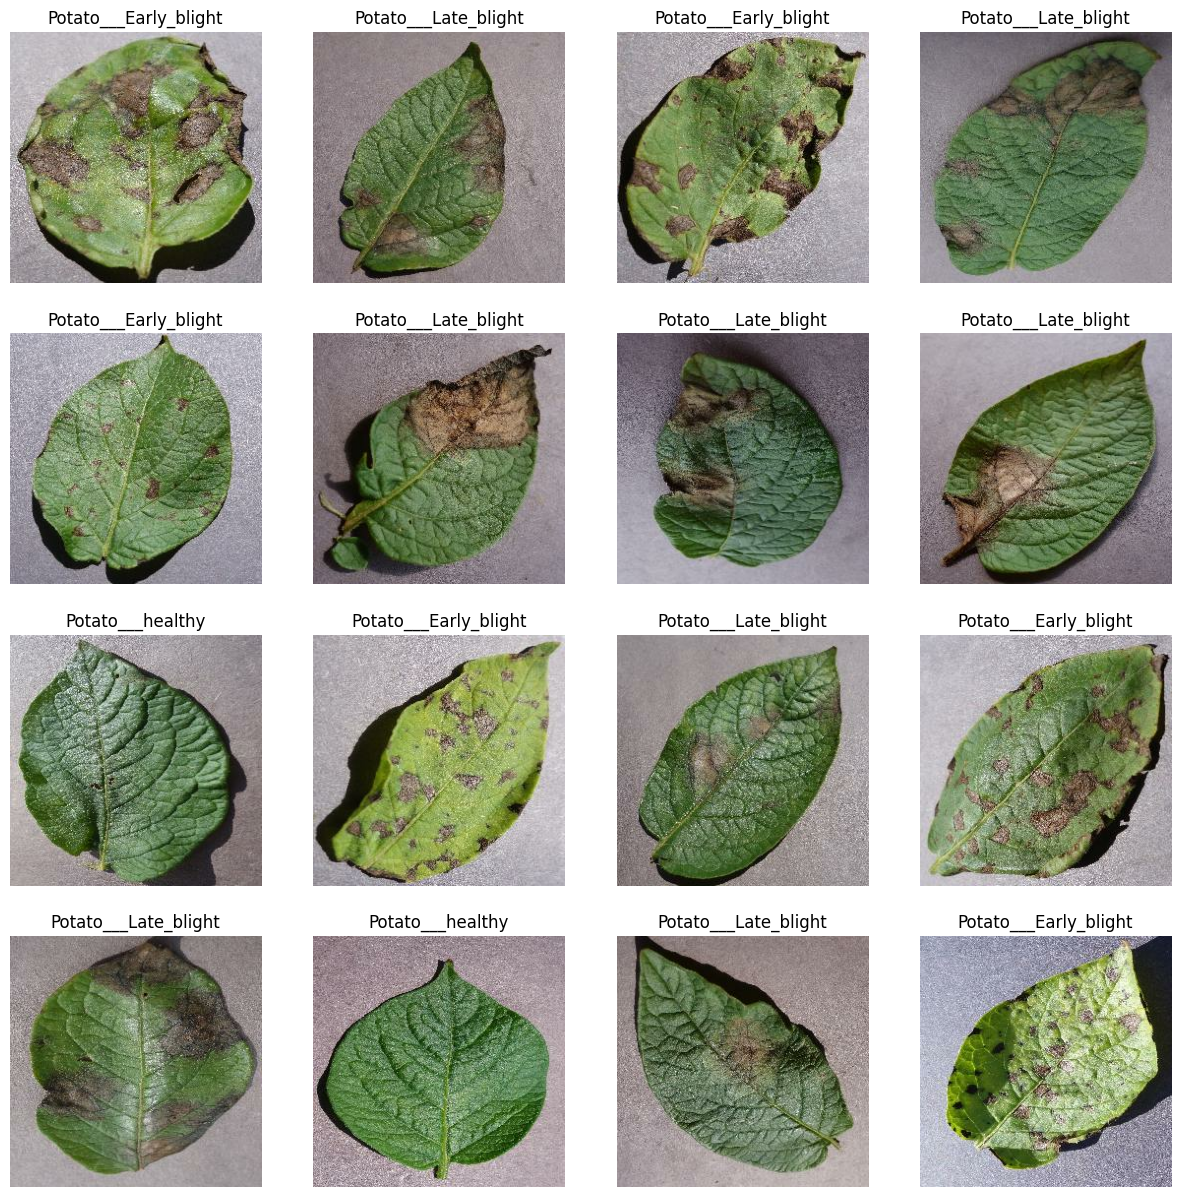

In [11]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in data.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

# Spliting the dataset

In [12]:
train_set,val_set,test_set = 0.75,0.15,0.5
train_amt=int(len(data)*train_set)
val_amt=int(len(data)*val_set)
test_amt=int(len(data)*test_set)
print(f"The train dataset is :{train_amt}\nThe validation dataset is :{val_amt}")

The train dataset is :51
The validation dataset is :10


In [13]:
def get_train_test_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
        ds_size = len(ds)
        if shuffle:
            ds = ds.shuffle(shuffle_size ,seed=43)
        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)

        train_data = ds.take(train_size)
        val_data = ds.skip(train_size).take(val_size)
        test_data = ds.skip(train_size).skip(val_size)
    
    
        return train_data,val_data,test_data



In [14]:
train_data,val_data,test_data=get_train_test_dataset(data,train_split=0.75,val_split=0.15,test_split=0.1)

In [15]:
len(test_data)

7

In [16]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building model

In [17]:
#from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.layers import Resizing, RandomFlip, RandomRotation ,Rescaling

In [18]:
resize_and_rescale=tf.keras.Sequential([
    Resizing(IMAGE_SIZE,IMAGE_SIZE),
    Rescaling(1.0/255)
]
)

In [19]:
data_aug=tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [24]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,col_cannels)
n_classes = 3

In [34]:
model =  models.Sequential([
    layers.Input(shape=input_shape),  
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation='softmax')
])


In [35]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [37]:
history = model.fit(
    train_data,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_data
)

Epoch 1/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 851ms/step - accuracy: 0.4877 - loss: 0.9667 - val_accuracy: 0.6750 - val_loss: 0.8036
Epoch 2/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 844ms/step - accuracy: 0.6941 - loss: 0.7492 - val_accuracy: 0.7625 - val_loss: 0.5773
Epoch 3/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 908ms/step - accuracy: 0.8047 - loss: 0.5059 - val_accuracy: 0.8094 - val_loss: 0.4411
Epoch 4/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 900ms/step - accuracy: 0.8593 - loss: 0.3461 - val_accuracy: 0.8156 - val_loss: 0.4479
Epoch 5/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 919ms/step - accuracy: 0.8819 - loss: 0.3134 - val_accuracy: 0.7812 - val_loss: 0.6262
Epoch 6/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 925ms/step - accuracy: 0.8638 - loss: 0.3433 - val_accuracy: 0.8906 - val_loss: 0.2814
Epoch 7/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 900ms/step - accuracy: 0.9027 - loss: 0.2297 - val_accuracy: 0.9000 - val_loss: 0.2573
Epoch 8/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 881ms/step - accuracy: 0.9286 - loss: 0.1970 - val_accu

In [38]:
acc_history = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Accuracy')

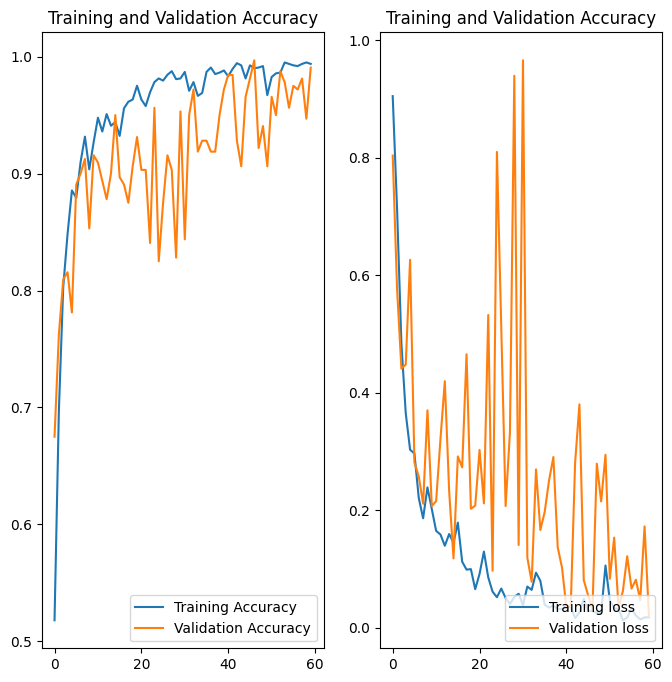

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc_history,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [42]:
scores = model.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.9975 - loss: 0.0107


In [57]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    prediction = model.predict(img_array)

    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100*(np.argmax(prediction[0])))

    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


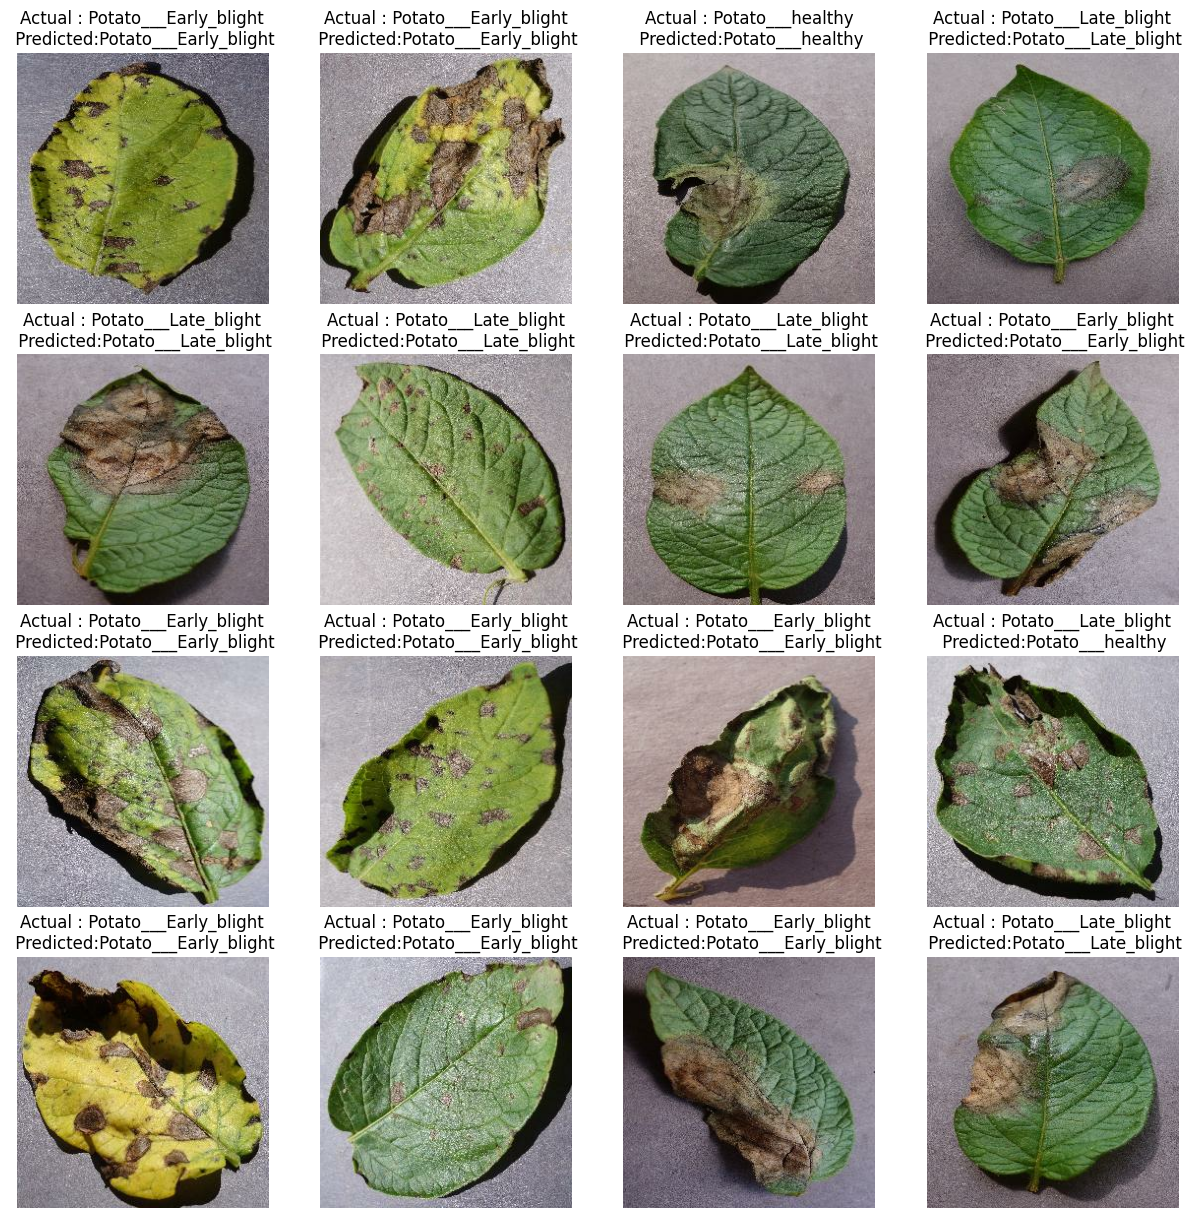

In [59]:
plt.figure(figsize=(15,15))
for images,labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))

        predicted_class ,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual : {actual_class}\n Predicted:{predicted_class}")
        plt.axis("off")

In [67]:
model.export("models")

INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


Saved artifact at 'models'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_91')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  3123829648720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123829648912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924115408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924114832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924115984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924117136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924117328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924117904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924118096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924118672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3123924118864: TensorSpec(shape=(), dtype